# 단변량분석_범주형변수

<img src='https://github.com/DA4BAM/image/blob/main/%EB%8B%A8%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D.png?raw=true' width=400/>

# 1.환경준비

## (1) 라이브러리 불러오기

In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## (2) 데이터 로딩

### 1) titanic
* url :  'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'

**[titanic_simple 데이터 셋 정보]**

- PassengerId : 승객번호
- Survived : 생존여부(1:생존, 0:사망)
- Pclass : 객실등급(1:1등급, 2:2등급, 3:3등급)
- Name : 승객이름
- Sex : 성별(male, female)
- Age : 나이
- Fare : 운임($)
- Embarked : 승선지역(Southampton, Cherbourg, Queenstown)

In [60]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'
titanic = pd.read_csv(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


### 2) New York Air Quality

* url : https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv

**[airquality 데이터 셋 정보]**

- Ozone: 오존 농도  
- Solar.R: 태양복사량
- Wind: 풍속
- Temp: 기온
- Date : 연,월,일

In [61]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv'
air = pd.read_csv(path)
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


# 2.범주형 변수

## (1) 수치화 : 기초통계량

* 범주형 변수는 범주별 빈도수와 비율을 확인합니다.
* 리스트.count(‘값’)
    * 해당 값이 몇 개 있는지 count 해 줍니다.
    * Count를 전체 개수(len(gender))로 나눠주면 비율이 됩니다.
    * 그런데, 범주가 두 세 개 정도면, 이렇게 계산하는 게 가능합니다.
    * 만약 범주가 10개라면?


### 1) 범주별 빈도수
* .value_counts() : 범주의 개수와 상관 없이 범주 별 개수를 count 해 줍니다.

In [62]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### 2) 범주별 비율
* .value_counts(normalize = True)

In [63]:
titanic['Pclass'].value_counts(normalize = True) # 0~1사이, 비율로변환

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

* titanic['Pclass’] 해석
    * .value_counts()를 이용하여 범주별 빈도수와 범주별 비율을 구할수 있습니다.
    * 3등급 객실 탑승객이 전체에서 55%를 차지합니다.
    * 1등급 객실이 24%, 2등급 객실이 20.7 %



<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] titanic의 Embarked에 대한 기초 통계량을 구하시오.

In [64]:
titanic[['Embarked']].describe().T

,count,unique,top,freq
Embarked,889,3,Southampton,644


In [65]:
print(titanic['Embarked'].value_counts())
print(titanic['Embarked'].value_counts(normalize=True))

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: Embarked, dtype: float64


[문2] titanic의 Survived에 대한 기초 통계량을 구하시오.

In [66]:
titanic[['Survived']].describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0


In [67]:
print(titanic['Survived'].value_counts())
print(titanic['Survived'].value_counts(normalize=True))

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [68]:
# 사망자 많은이유 : 구명보트가 적었다

## (2) 시각화

### 1) bar chart

* seaborn의 countplot
    * plt.bar() 를 이용하려면 먼저 집계한 후 결과를 가지고 그래프를 그려야 합니다.
    * countplot은 집계 + bar plot을 한꺼번에 해결해줍니다!

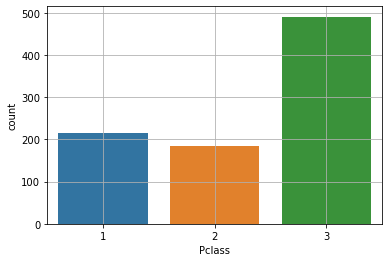

In [69]:
sns.countplot(x=titanic['Pclass'])
# sns.countplot(x='Pclass', data=titanic)
# sns.countplot(y='Pclass', data=titanic) # 가로로
plt.grid()
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] titanic의 Embarked에 대한 bar chart를 그리시오.

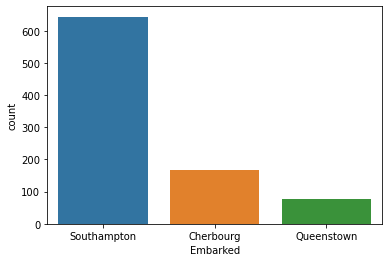

In [70]:
sns.countplot(x='Embarked',data=titanic)
plt.show()

### 2) (추가) pie chart

* 범주별 비율 비교할 때 파이차트 사용.
* 역시 먼저 집계를 해야 합니다.
* plt.pie( 값, labels=범주이름, autopct = ‘%.2f%%’)
    * autopct = ‘%**.2f%**%’ : 그래프에 표시할 값 비율 값에 대한 설정입니다.
        * **.2f%** : 소수점 두 자리 퍼센트로 표기 한다는 의미.


* pie chart 기본

In [71]:
temp = titanic['Pclass'].value_counts()
display(temp.values), display(temp.index)

array([491, 216, 184], dtype=int64)

Int64Index([3, 1, 2], dtype='int64')

(None, None)

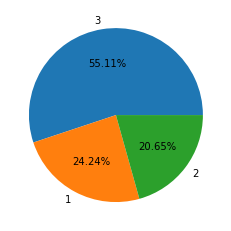

In [72]:
temp = titanic['Pclass'].value_counts()

plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')
plt.show()

* pie chart 꾸미기 1

    * 각도와 방향 조정
        * startangle = 90 : 90도 부터 시작
        * counterclock = False : 시계 방향으로

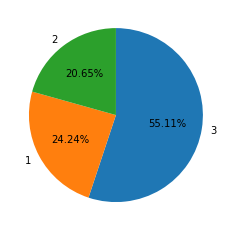

In [73]:
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%',
        startangle=90, counterclock=False)
plt.show()

* pie chart 꾸미기 2

    * 간격 띄우고, 그림자 넣기
        * explode = [0.05, 0.05,0.05] : 중심으로 부터 1,2,3 을 얼마만큼 띄울지
        * shadow = True : 그림자 추가



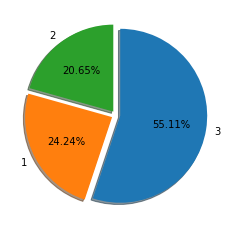

In [74]:
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%',
        startangle=90, counterclock=False,
        explode = [0.05, 0.05, 0.05], shadow=True)
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

In [79]:
temp=titanic['Embarked'].value_counts()
temp

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

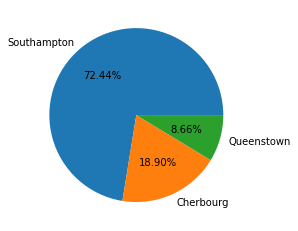

In [86]:
# 1) titanic의 Embarked에 대한 pie chart를 그리시오.
# * 소수점 1자리까지 비율(%)를 표시하시오.

plt.pie(temp.values, labels = temp.index,  autopct = '%.2f%%',)
plt.show()

In [ ]:
temp = titanic['Pclass'].value_counts()

plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')
plt.show()

# 3.복습문제

## (1) 환경준비
* 라이브러리 불러오기

In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

* 보스톤 집값 데이터를 이용하여 다음의 복습문제를 풀어 봅시다.

**변수설명**
> * medv  : 1978 보스턴 주택 가격, 506개 타운의 주택 가격 중앙값 (단위 1,000 달러) <== Target
* crim	범죄율
* zn	25,000 평방피트를 초과 거주지역 비율
* indus	비소매상업지역 면적 비율
* chas	찰스강변 위치(범주 : 강변1, 아니면 0)
* nox	일산화질소 농도
* rm	주택당 방 수
* age	1940년 이전에 건축된 주택의 비율
* dis	직업센터의 거리
* rad	방사형 고속도로까지의 거리
* tax	재산세율
* ptratio	학생/교사 비율
* lstat	인구 중 하위 계층 비율


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## (2) 단변량 분석

* chas(찰스강변 여부)

In [44]:
boston[['chas']].describe().T

,count,mean,std,min,25%,50%,75%,max
chas,506.0,0.06917,0.253994,0.0,0.0,0.0,0.0,1.0


In [45]:
boston['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [46]:
boston['chas'].value_counts(normalize=True)

0    0.93083
1    0.06917
Name: chas, dtype: float64

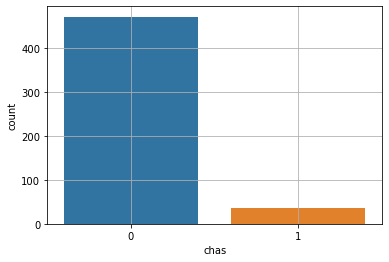

In [55]:
sns.countplot(x=boston['chas'])
plt.grid()
plt.show()